<a href="https://colab.research.google.com/github/Abdoo50/Abdoo50/blob/main/Simplelinearregression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-07-14 14:09:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2022-07-14 14:09:29 (2.81 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
flcons=pd.read_csv("FuelConsumption.csv")


In [4]:
flcons

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
flcons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
flcons.shape


(1067, 13)

In [7]:
flcons.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
flcons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
# Exploring features 
featuresflcons=flcons[['ENGINESIZE',
             'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
featuresflconsML=flcons[['ENGINESIZE',
             'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

In [10]:
featuresflconsML

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,9.9,6.7,196,8.5
1,2.4,4,11.2,7.7,221,9.6
2,1.5,4,6.0,5.8,136,5.9
3,3.5,6,12.7,9.1,255,11.1
4,3.5,6,12.1,8.7,244,10.6
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,271,11.8
1063,3.2,6,13.2,9.5,264,11.5
1064,3.0,6,13.4,9.8,271,11.8
1065,3.2,6,12.9,9.3,260,11.3


In [11]:
type(featuresflcons)

pandas.core.frame.DataFrame

In [12]:
featuresflcons.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244
5,3.5,6,11.9,7.7,230
6,3.5,6,11.8,8.1,232
7,3.7,6,12.8,9.0,255
8,3.7,6,13.4,9.5,267
9,2.4,4,10.6,7.5,212


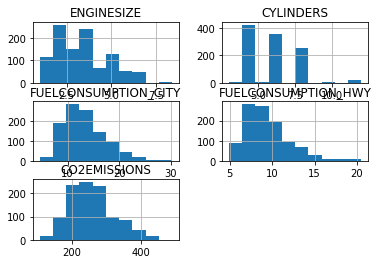

In [13]:
featuresflcons.hist()
plt.show()

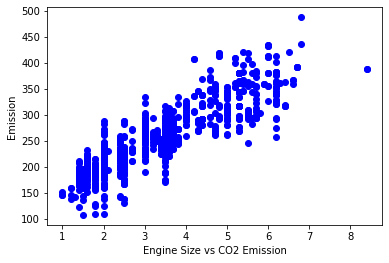

In [14]:
plt.scatter(featuresflcons.ENGINESIZE,
            featuresflcons.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size vs CO2 Emission")
plt.ylabel("Emission")
plt.show()

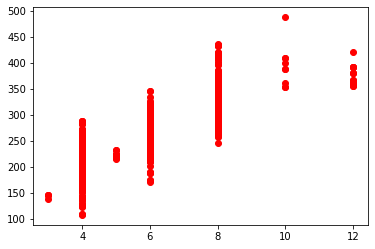

In [15]:
plt.scatter(featuresflcons.CYLINDERS,featuresflcons.CO2EMISSIONS, color='Red')

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [17]:
regression=linear_model.LinearRegression()

In [18]:
np.random.rand(len(featuresflcons)) < 0.8

array([ True,  True,  True, ...,  True,  True,  True])

In [19]:
ftModel=featuresflcons
X=featuresflcons[['ENGINESIZE']]

In [20]:
ftModel.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


In [21]:
X.values

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [22]:
Y=featuresflcons[['CO2EMISSIONS']]

In [23]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
regression.fit(X_Train,Y_Train)

LinearRegression()

In [25]:
print ('Coefficients: ', regression.coef_)
print ('Intercept: ',regression.intercept_)


Coefficients:  [[39.24838431]]
Intercept:  [126.18920155]


Text(0, 0.5, 'Emission')

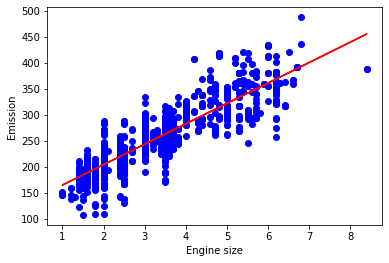

In [29]:
plt.scatter(featuresflcons.ENGINESIZE,
            featuresflcons.CO2EMISSIONS, color='blue')
plt.plot(X_Train, regression.coef_[0][0]*X_Train + regression.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [30]:
from sklearn.metrics import r2_score

In [31]:
Y_Test_Hat=regression.predict(X_Test)

In [32]:
r2_score(Y_Test_Hat,Y_Test)

0.6286209384098277

In [33]:
XM=featuresflconsML[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']]
YM=featuresflconsML[['CO2EMISSIONS']]

In [34]:
XM_Train,XM_Test,YM_Train,YM_Test=train_test_split(XM,YM,test_size=0.2,random_state=0)

In [35]:
multiregression=linear_model.LinearRegression()

In [36]:
multiregression.fit(XM_Train,YM_Train)

LinearRegression()

In [37]:
print ('Coefficients: ', multiregression.coef_)

Coefficients:  [[11.99897826  7.61636533  4.29566523  4.7423976 ]]


In [38]:
YM_Test_Hat=multiregression.predict(XM_Test)

In [39]:
r2_score(YM_Test_Hat,YM_Test)

0.8257757509059979

In [40]:
multiregression.score(XM_Test,YM_Test)

0.8599443136450631